# Librerías

In [27]:
#Importing packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pdp
plt.style.use('seaborn')

# Data

Fuente: http://www.madrid.org/iestadis/

In [28]:
#Loading data.
xls = pd.ExcelFile('../data/hipotecas.xlsx')
# df1_2020 = pd.read_excel(xls, '2020_numero')
# df2_2020 = pd.read_excel(xls, '2020_capital_medio')
# df3_2020 = pd.read_excel(xls, '2020_capital')
df1_2021 = pd.read_excel(xls, '2021_numero')
df2_2021 = pd.read_excel(xls, '2021_capital_medio')
df3_2021 = pd.read_excel(xls, '2021_capital')

# EDA

In [29]:
df1_2021

,Lugar,Enero_2020,Febrero_2020,Marzo_2020,Abril_2020,Mayo_2020,Junio_2020,Julio_2020,Agosto_2020,Septiembre_2020,Octubre_2020,Noviembre_2020,Diciembre_2020,Enero_2021,Febrero_2021,Marzo_2021,Abril_2021,Mayo_2021,Junio_2021
0,España,40217,36702,27300,24155,25538,26748,26014,19825,26878,28248,28756,26128,27518,31647,36886,31909,35225.0,37961.0
1,Andalucía,7017,6864,5284,5571,4777,4489,4598,3689,5030,5697,5474,4933,5591,6227,6941,6327,NaN,NaN
2,Almería,674,769,470,460,452,437,394,349,483,665,477,404,600,586,499,518,NaN,NaN
3,Cádiz,1040,955,896,791,750,450,532,490,634,775,900,750,808,898,1111,974,NaN,NaN
4,Córdoba,458,521,410,500,290,432,312,377,455,392,386,309,520,501,695,604,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Bizkaia,875,1025,682,630,717,1049,892,603,865,675,902,758,762,818,851,793,NaN,NaN
59,Gipuzkoa,502,490,369,383,319,1562,479,313,404,562,482,555,417,515,595,517,NaN,NaN
60,"Rioja, La",238,176,254,180,124,134,202,174,142,179,197,123,153,215,203,214,NaN,NaN
61,Ceuta,48,8,30,11,88,28,13,5,17,21,5,6,7,28,19,28,NaN,NaN


In [30]:
#Shape of data.
df1_2021.shape

(63, 19)

In [31]:
#Data types and variables.
df1_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lugar            63 non-null     object 
 1   Enero_2020       63 non-null     int64  
 2   Febrero_2020     63 non-null     int64  
 3   Marzo_2020       63 non-null     int64  
 4   Abril_2020       63 non-null     int64  
 5   Mayo_2020        63 non-null     int64  
 6   Junio_2020       63 non-null     int64  
 7   Julio_2020       63 non-null     int64  
 8   Agosto_2020      63 non-null     int64  
 9   Septiembre_2020  63 non-null     int64  
 10  Octubre_2020     63 non-null     int64  
 11  Noviembre_2020   63 non-null     int64  
 12  Diciembre_2020   63 non-null     int64  
 13  Enero_2021       63 non-null     int64  
 14  Febrero_2021     63 non-null     int64  
 15  Marzo_2021       63 non-null     int64  
 16  Abril_2021       63 non-null     int64  
 17  Mayo_2021        1

In [32]:
#Porcentaje de valores NA de cada variable
percentage_NaN = df1_2021.apply(lambda x:sum(x.isna()/len(df1_2021)))
percentage_NaN.sort_values(ascending = False).head(10)

Junio_2021        0.984127
Mayo_2021         0.984127
Octubre_2020      0.000000
Abril_2021        0.000000
Marzo_2021        0.000000
Febrero_2021      0.000000
Enero_2021        0.000000
Diciembre_2020    0.000000
Noviembre_2020    0.000000
Lugar             0.000000
dtype: float64

In [33]:
df1_2021.describe()

,Enero_2020,Febrero_2020,Marzo_2020,Abril_2020,Mayo_2020,Junio_2020,Julio_2020,Agosto_2020,Septiembre_2020,Octubre_2020,Noviembre_2020,Diciembre_2020,Enero_2021,Febrero_2021,Marzo_2021,Abril_2021,Mayo_2021,Junio_2021
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.00000,63.000000,63.000000,63.000000,1.0,1.0
mean,1697.492063,1575.698413,1176.920635,1049.285714,1098.777778,1147.587302,1135.555556,859.444444,1152.380952,1209.412698,1243.682540,1132.936508,1194.68254,1361.857143,1587.523810,1372.238095,35225.0,37961.0
std,5187.177845,4758.688321,3536.701814,3150.078081,3309.064220,3447.444044,3351.787731,2535.122010,3462.427917,3649.562350,3711.858207,3370.058777,3548.42567,4079.979174,4781.683888,4137.810504,NaN,NaN
min,40.000000,8.000000,26.000000,11.000000,30.000000,1.000000,13.000000,5.000000,17.000000,13.000000,5.000000,6.000000,7.00000,28.000000,19.000000,28.000000,35225.0,37961.0
25%,228.500000,202.500000,168.000000,123.500000,134.000000,156.500000,147.000000,140.500000,146.000000,186.500000,185.000000,160.500000,163.00000,216.000000,208.000000,199.500000,35225.0,37961.0
50%,580.000000,490.000000,386.000000,334.000000,319.000000,425.000000,362.000000,313.000000,404.000000,392.000000,404.000000,398.000000,458.00000,486.000000,579.000000,450.000000,35225.0,37961.0
75%,1266.500000,1047.000000,804.000000,649.500000,738.000000,819.500000,847.500000,701.500000,844.000000,787.500000,888.000000,779.000000,800.00000,920.500000,1089.500000,844.000000,35225.0,37961.0
max,40217.000000,36702.000000,27300.000000,24155.000000,25538.000000,26748.000000,26014.000000,19825.000000,26878.000000,28248.000000,28756.000000,26128.000000,27518.00000,31647.000000,36886.000000,31909.000000,35225.0,37961.0


In [34]:
# Report = pdp.ProfileReport(df1_2021, title = 'Data', minimal = True)
# Report

# Estudio

## Número de hipotecas

### España

In [35]:
f0 = df1_2021['Lugar'] == "España"
españa = df1_2021[f0]

In [36]:
del(españa["Lugar"])
españa = españa.transpose()

In [37]:
españa

,0
Enero_2020,40217.0
Febrero_2020,36702.0
Marzo_2020,27300.0
Abril_2020,24155.0
Mayo_2020,25538.0
Junio_2020,26748.0
Julio_2020,26014.0
Agosto_2020,19825.0
Septiembre_2020,26878.0
Octubre_2020,28248.0


### Comunidad de Madrid

In [38]:
df1_2021

,Lugar,Enero_2020,Febrero_2020,Marzo_2020,Abril_2020,Mayo_2020,Junio_2020,Julio_2020,Agosto_2020,Septiembre_2020,Octubre_2020,Noviembre_2020,Diciembre_2020,Enero_2021,Febrero_2021,Marzo_2021,Abril_2021,Mayo_2021,Junio_2021
0,España,40217,36702,27300,24155,25538,26748,26014,19825,26878,28248,28756,26128,27518,31647,36886,31909,35225.0,37961.0
1,Andalucía,7017,6864,5284,5571,4777,4489,4598,3689,5030,5697,5474,4933,5591,6227,6941,6327,NaN,NaN
2,Almería,674,769,470,460,452,437,394,349,483,665,477,404,600,586,499,518,NaN,NaN
3,Cádiz,1040,955,896,791,750,450,532,490,634,775,900,750,808,898,1111,974,NaN,NaN
4,Córdoba,458,521,410,500,290,432,312,377,455,392,386,309,520,501,695,604,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Bizkaia,875,1025,682,630,717,1049,892,603,865,675,902,758,762,818,851,793,NaN,NaN
59,Gipuzkoa,502,490,369,383,319,1562,479,313,404,562,482,555,417,515,595,517,NaN,NaN
60,"Rioja, La",238,176,254,180,124,134,202,174,142,179,197,123,153,215,203,214,NaN,NaN
61,Ceuta,48,8,30,11,88,28,13,5,17,21,5,6,7,28,19,28,NaN,NaN


In [39]:
f0 = df1_2021['Lugar'] == " Madrid"
madrid = df1_2021[f0]

In [40]:
del(madrid["Lugar"])
madrid = madrid.transpose()

In [41]:
madrid

,53
Enero_2020,8660.0
Febrero_2020,6820.0
Marzo_2020,4749.0
Abril_2020,3974.0
Mayo_2020,4979.0
Junio_2020,5101.0
Julio_2020,3833.0
Agosto_2020,3059.0
Septiembre_2020,5077.0
Octubre_2020,5504.0


### Cataluña

In [42]:
f0 = df1_2021['Lugar'] == " Cataluña"
cataluña = df1_2021[f0]

In [43]:
del(cataluña["Lugar"])
cataluña = cataluña.transpose()

In [44]:
cataluña

,36
Enero_2020,5584.0
Febrero_2020,6437.0
Marzo_2020,4985.0
Abril_2020,4322.0
Mayo_2020,4311.0
Junio_2020,4142.0
Julio_2020,4400.0
Agosto_2020,2787.0
Septiembre_2020,3968.0
Octubre_2020,4091.0


### Comparativa

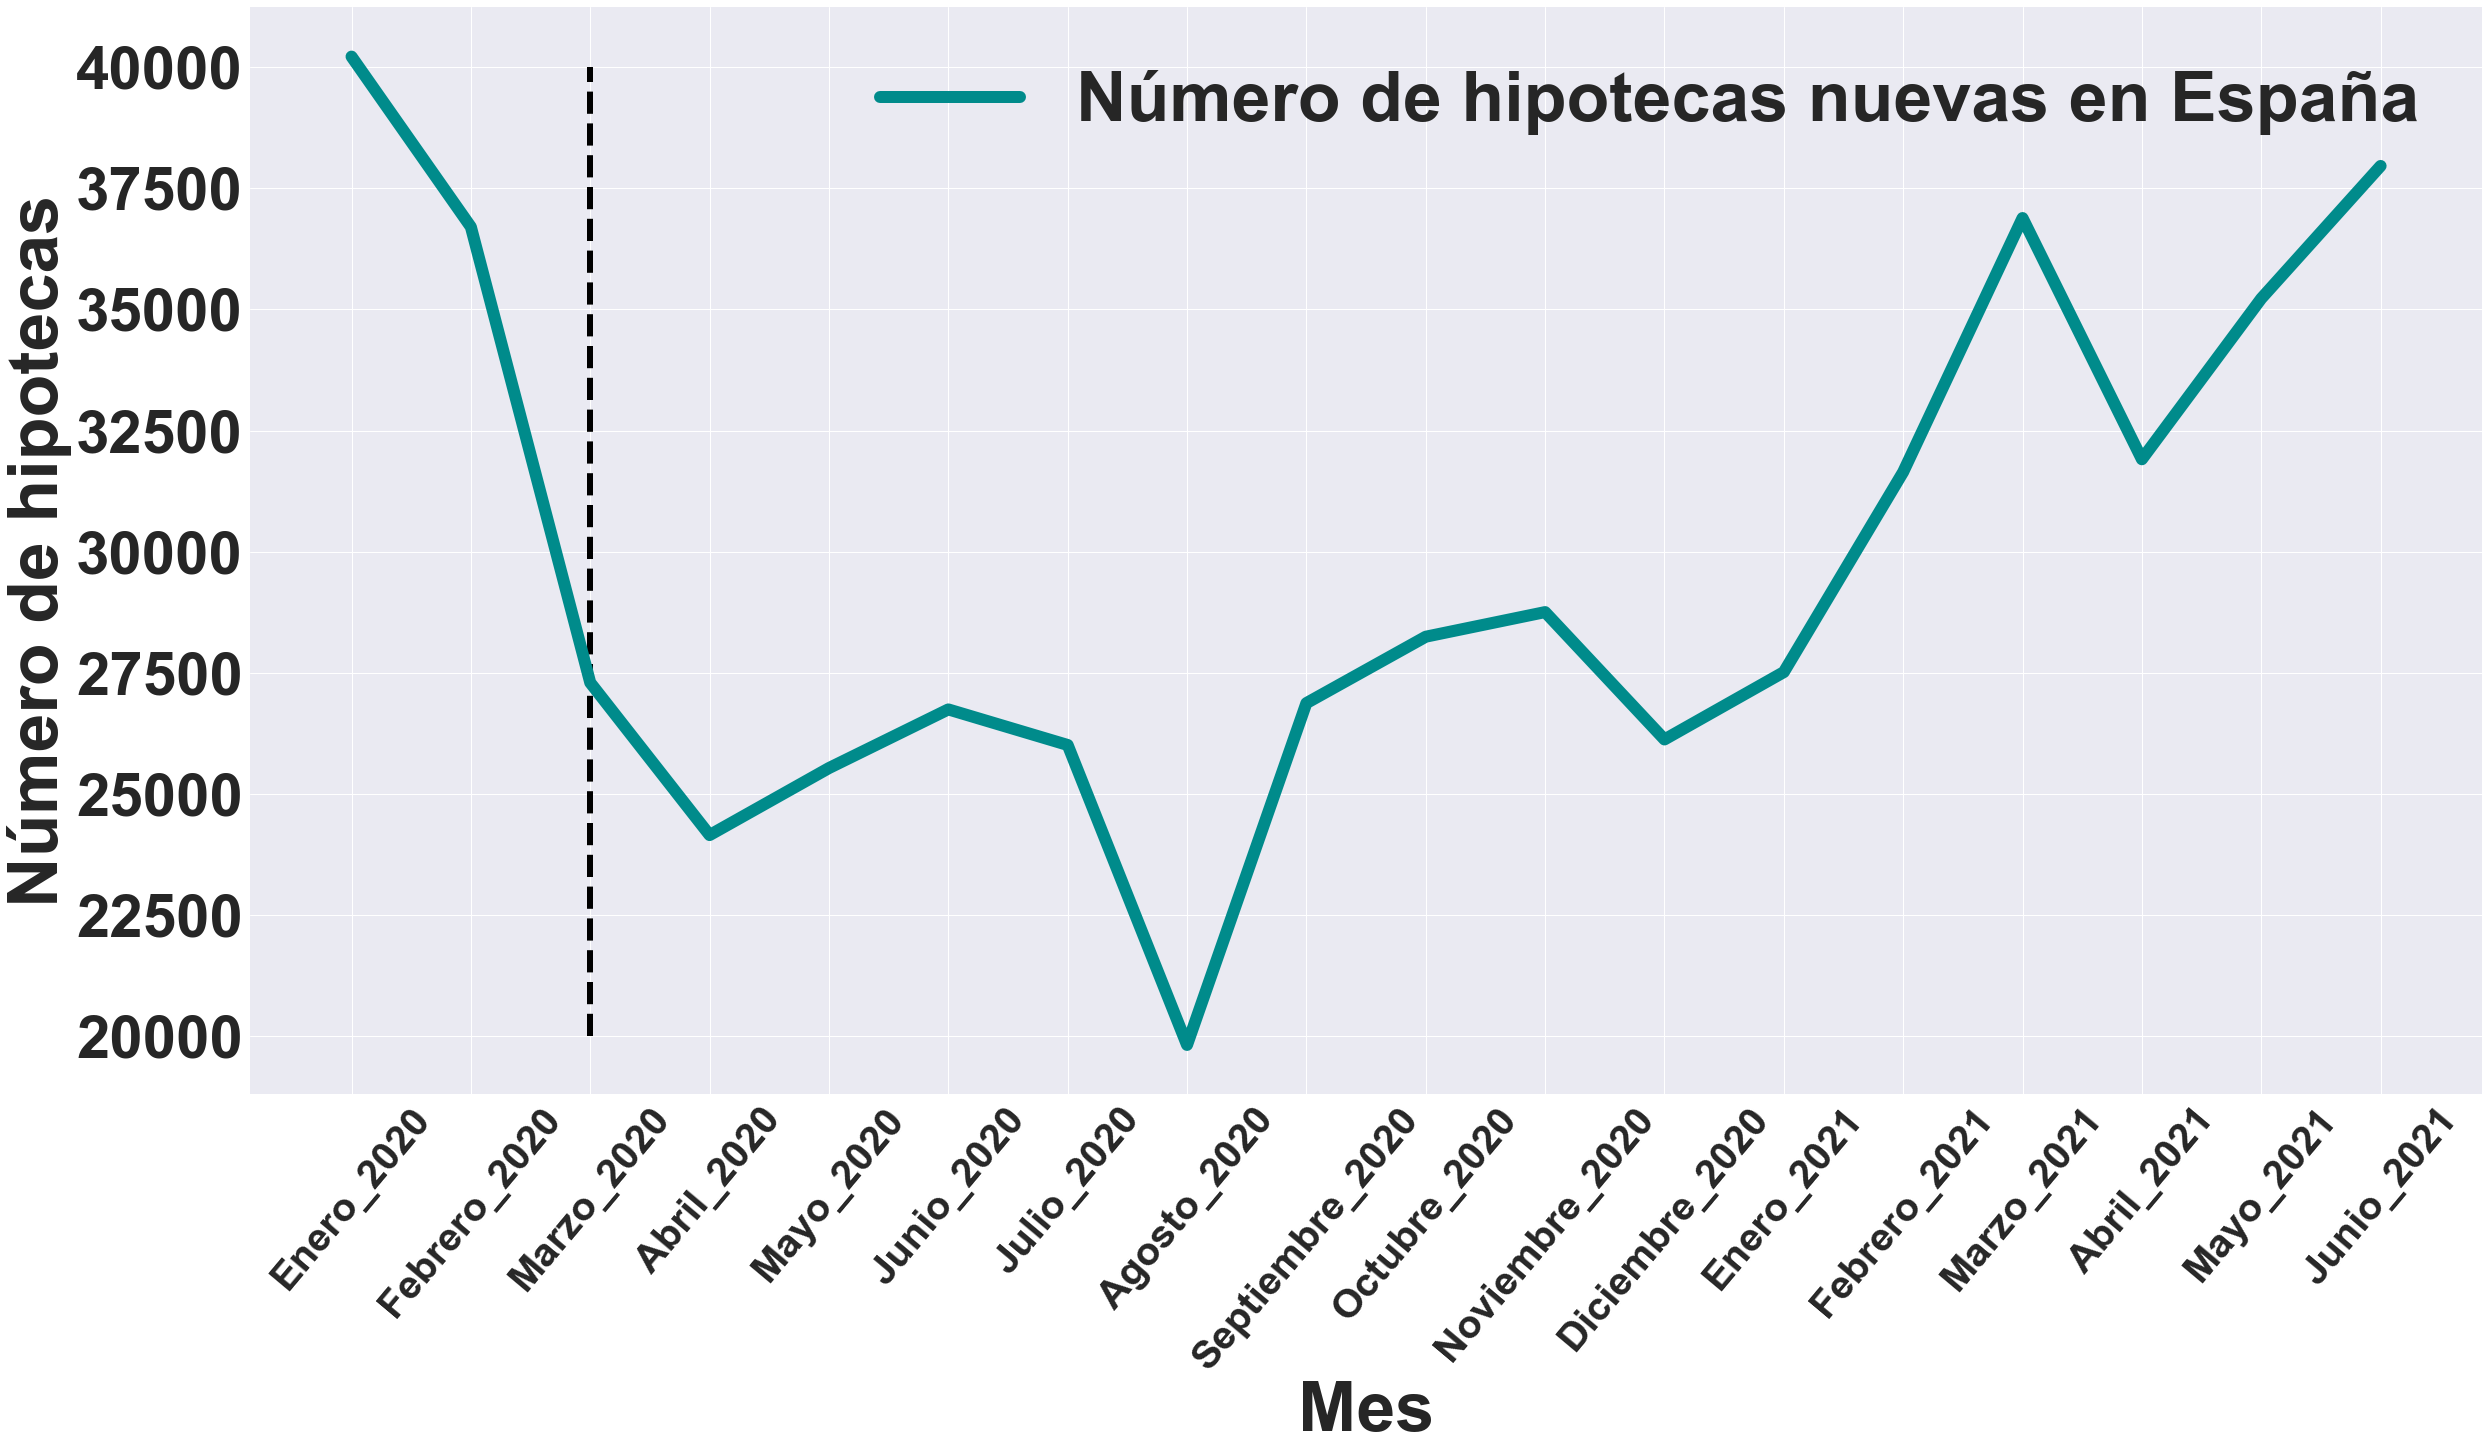

In [46]:
fig = plt.figure(figsize=(40,20))

ax1 = plt.plot(españa, marker='', markerfacecolor='blue', markersize=1, color='darkcyan', 
          linewidth=12)

ax1 = plt.xlabel("Mes", fontsize=70, weight="bold")
x = plt.xticks(fontsize=40, rotation=50, weight="bold")
ax1 = plt.ylabel("Número de hipotecas", fontsize=70, weight="bold")
y = plt.yticks(fontsize=60, weight="bold")

ax1 = plt.legend(['Número de hipotecas nuevas en España'],prop={"size":70, 'weight':'bold'}, loc="upper right")

plt.vlines("Marzo_2020", 20000, 40000, linestyles='dashed', colors='black', linewidth=6)

plt.grid(True)
plt.show()

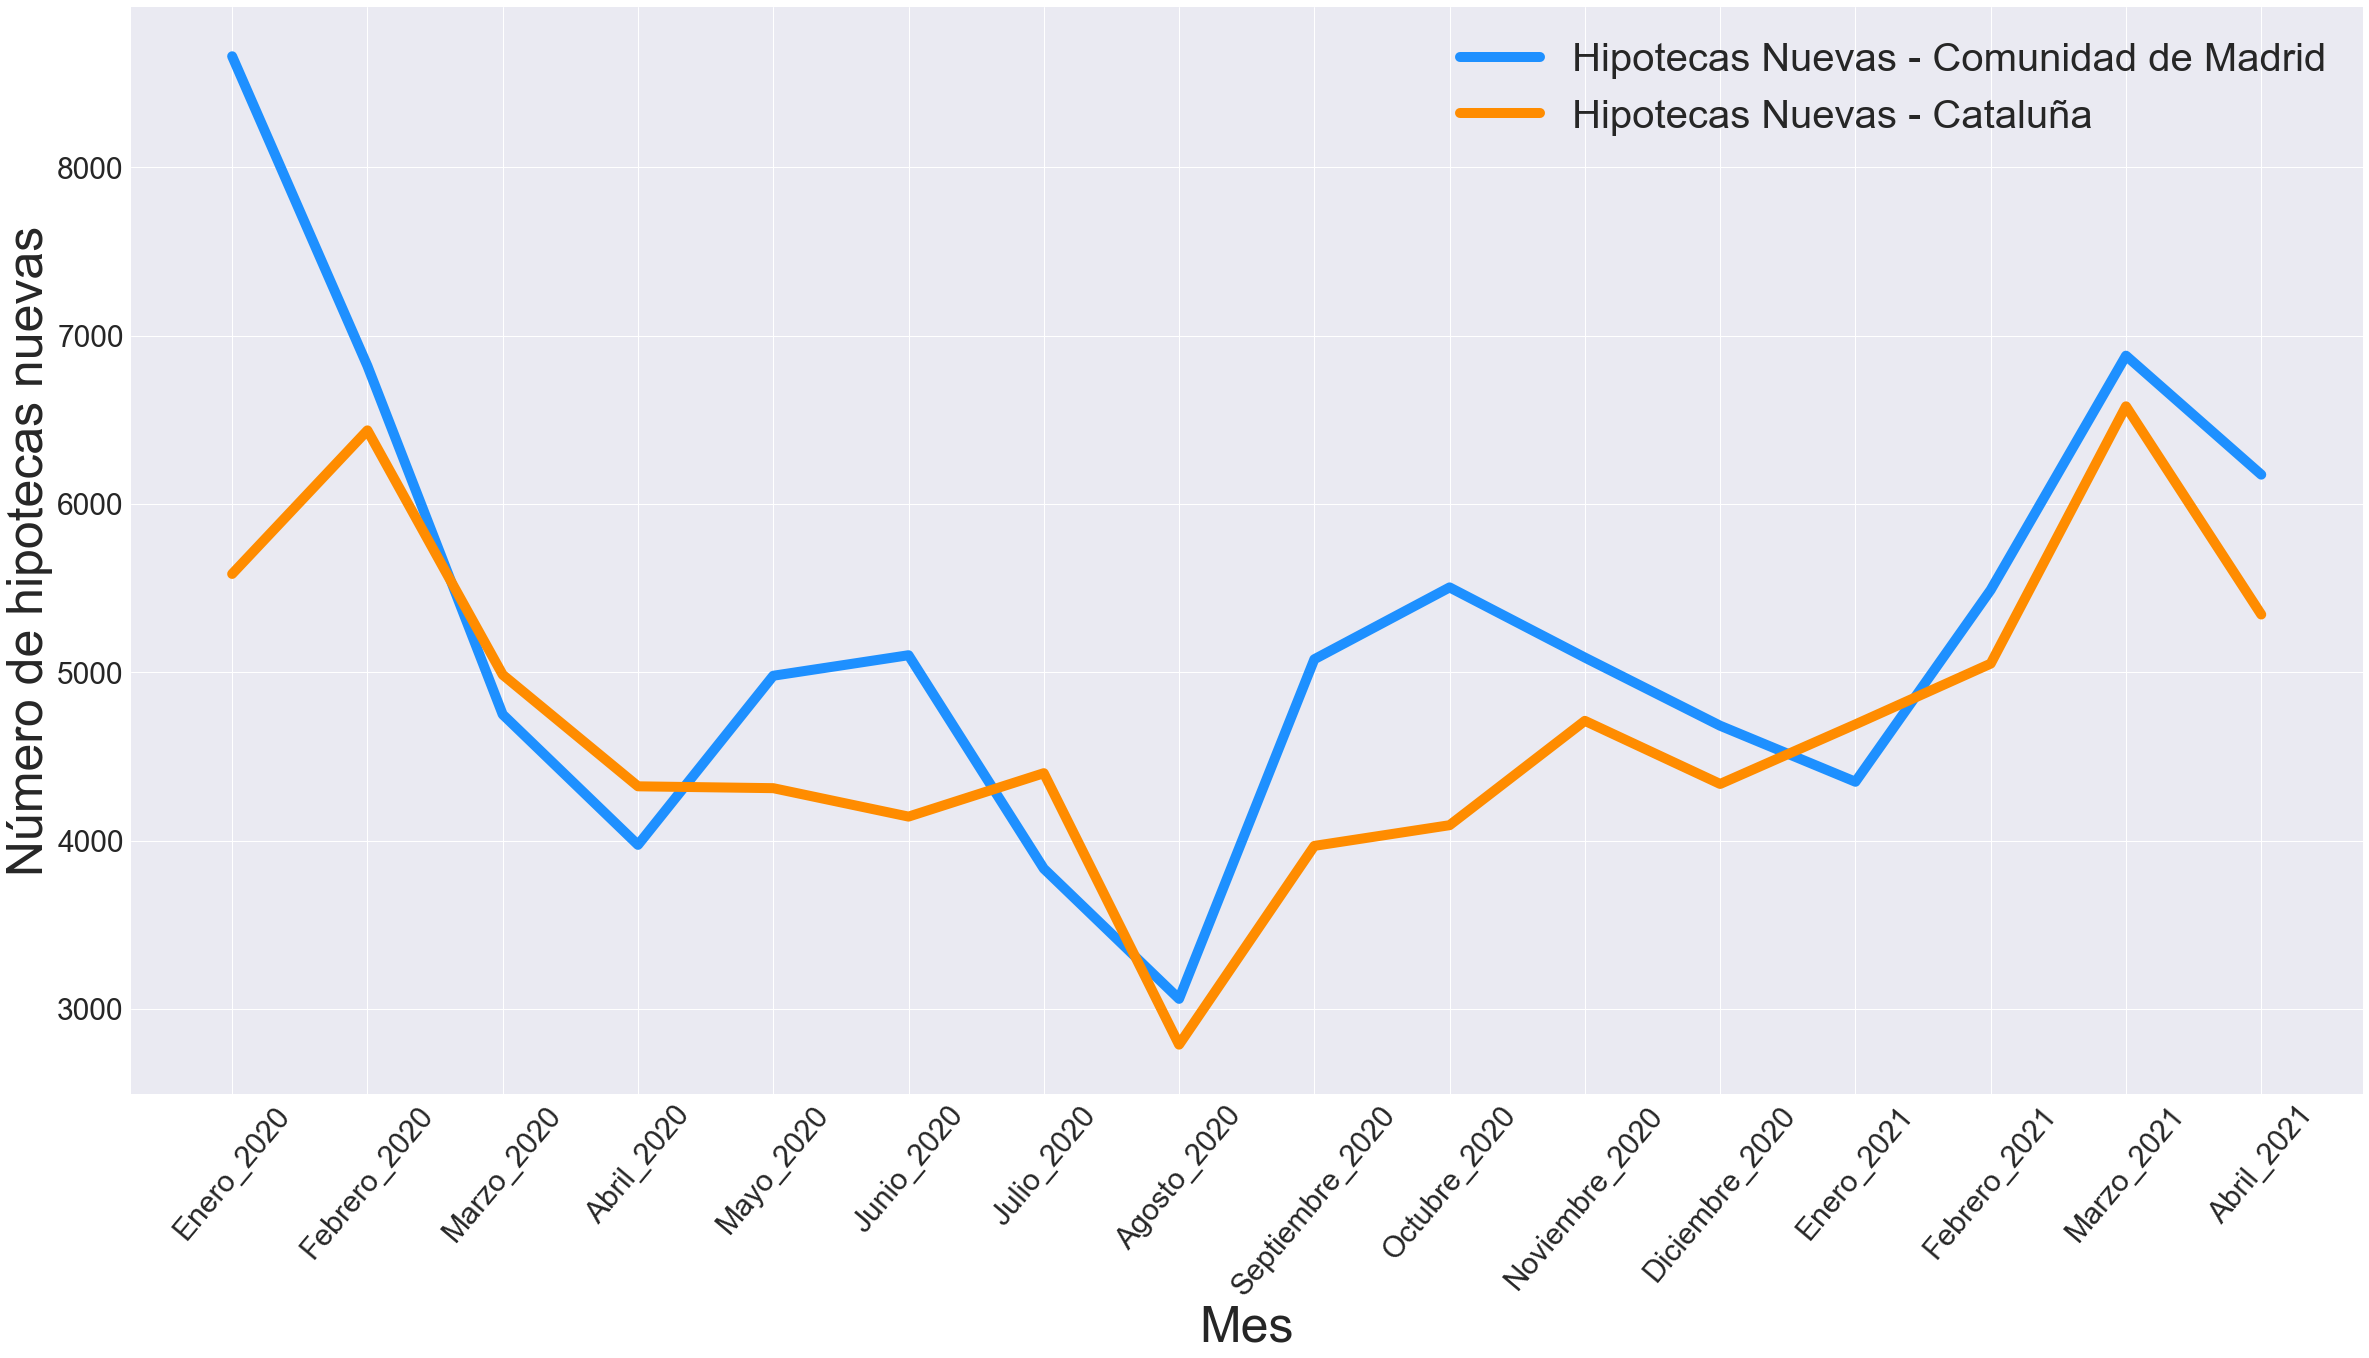

In [57]:
fig = plt.figure(figsize=(40,20))

plt.plot(madrid, marker='', markerfacecolor='blue', markersize=1, color='dodgerblue', 
          linewidth=10, label = 'Hipotecas Nuevas - Comunidad de Madrid')

plt.plot(cataluña, marker='', markerfacecolor='blue', markersize=1, color='darkorange', 
          linewidth=10, label = 'Hipotecas Nuevas - Cataluña')


ax1 = plt.xlabel("Mes", fontsize=50)
x = plt.xticks(fontsize=30, rotation=50)
ax1 = plt.ylabel("Número de hipotecas nuevas", fontsize=50)
y = plt.yticks(fontsize=30)

ax1 = plt.legend(prop={"size":40}, loc="upper right")

plt.grid(True)
plt.show()

## Capital medio de las hipotecas

In [21]:
df2_2021

,Lugar,Enero_2020,Febrero_2020,Marzo_2020,Abril_2020,Mayo_2020,Junio_2020,Julio_2020,Agosto_2020,Septiembre_2020,Octubre_2020,Noviembre_2020,Diciembre_2020,Enero_2021,Febrero_2021,Marzo_2021,Abril_2021
0,España,114.691382,175.114435,128.430073,125.186462,127.145235,131.669807,132.346352,134.678487,135.035159,134.919747,136.675546,135.657532,129.002798,131.379720,137.728705,139.463819
1,Andalucía,98.687857,162.985431,107.385882,105.483935,103.984090,100.937180,132.315572,112.991326,118.307555,114.423732,114.457435,114.494628,109.816491,115.734061,114.941939,112.686897
2,Almería,64.311705,536.117035,81.268085,78.067391,79.331858,76.732265,82.657360,81.492837,84.165631,92.078195,79.031447,81.995050,81.008333,78.479522,83.893788,86.635135
3,Cádiz,94.805355,101.158115,99.039062,96.639697,101.978667,100.286667,107.050752,101.938776,98.214511,102.949677,98.052222,102.092000,106.793317,105.447661,102.245725,102.020534
4,Córdoba,101.420354,87.305182,98.992683,107.428000,101.465517,122.361111,90.727564,138.543767,105.153846,99.938776,113.797927,87.524272,100.776923,101.469062,107.735252,98.274834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Bizkaia,150.098851,149.211707,157.350440,144.579365,154.481172,150.983794,164.595291,138.548922,142.686705,154.844444,148.926829,166.984169,153.341207,146.376528,143.997650,158.674653
59,Gipuzkoa,165.203390,167.346939,162.994580,169.070496,155.680251,115.110115,171.173278,161.635783,162.415842,174.966192,165.529046,172.789189,167.223022,160.423301,151.378151,171.731141
60,"Rioja, La",85.592437,89.704545,75.535433,92.088889,96.725806,82.261194,101.792079,86.793103,93.866197,93.005587,94.385787,89.292683,85.803922,85.525581,91.724138,99.331776
61,Ceuta,139.479167,125.000000,127.600000,152.818182,183.511364,127.142857,127.000000,156.000000,110.294118,114.285714,169.200000,116.500000,97.142857,124.571429,143.263158,128.571429


In [22]:
#Shape of data.
df2_2021.shape

(63, 17)

In [23]:
#Data types and variables.
df2_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lugar            63 non-null     object 
 1   Enero_2020       63 non-null     float64
 2   Febrero_2020     63 non-null     float64
 3   Marzo_2020       63 non-null     float64
 4   Abril_2020       63 non-null     float64
 5   Mayo_2020        63 non-null     float64
 6   Junio_2020       63 non-null     float64
 7   Julio_2020       63 non-null     float64
 8   Agosto_2020      63 non-null     float64
 9   Septiembre_2020  63 non-null     float64
 10  Octubre_2020     63 non-null     float64
 11  Noviembre_2020   63 non-null     float64
 12  Diciembre_2020   63 non-null     float64
 13  Enero_2021       63 non-null     float64
 14  Febrero_2021     63 non-null     float64
 15  Marzo_2021       63 non-null     float64
 16  Abril_2021       63 non-null     float64
dtypes: float64(16), ob

In [24]:
#Porcentaje de valores NA de cada variable
percentage_NaN = df2_2021.apply(lambda x:sum(x.isna()/len(df2_2021)))
percentage_NaN.sort_values(ascending = False).head(10)

Lugar              0.0
Septiembre_2020    0.0
Marzo_2021         0.0
Febrero_2021       0.0
Enero_2021         0.0
Diciembre_2020     0.0
Noviembre_2020     0.0
Octubre_2020       0.0
Agosto_2020        0.0
Enero_2020         0.0
dtype: float64

In [25]:
df2_2021.describe()

,Enero_2020,Febrero_2020,Marzo_2020,Abril_2020,Mayo_2020,Junio_2020,Julio_2020,Agosto_2020,Septiembre_2020,Octubre_2020,Noviembre_2020,Diciembre_2020,Enero_2021,Febrero_2021,Marzo_2021,Abril_2021
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,98.007841,119.982342,105.747259,103.806249,104.994390,104.507521,107.650423,110.395630,108.951661,107.803123,110.007110,111.415204,108.245078,107.726300,111.140318,109.008795
std,26.085306,80.047913,28.507660,25.924558,28.905103,27.018346,30.437458,32.454443,28.096443,28.547486,31.676217,30.609548,26.167907,30.974460,29.089094,31.956697
min,55.112790,68.419355,63.023256,61.754386,66.317757,62.508333,40.055901,58.172414,65.495787,64.679245,73.097561,69.142857,74.486339,64.032258,72.862745,61.781609
25%,80.431194,86.251963,87.585558,86.681804,84.084491,83.112794,86.880490,86.457955,88.963851,90.493436,86.323149,86.652108,90.276063,85.448197,87.217957,87.382917
50%,93.331833,97.281521,98.992683,96.639697,96.565217,100.937180,100.763889,103.134615,104.068493,100.740741,105.512346,104.112745,102.848718,101.142234,105.516432,100.916854
75%,107.534984,111.994517,115.097683,109.784539,115.978696,114.570399,128.478905,124.162130,118.307308,117.936943,117.166948,129.075598,114.975608,115.495448,120.797272,114.419935
max,165.203390,536.117035,193.527778,176.523402,183.511364,198.203293,191.418210,226.146825,197.082529,198.960574,220.076087,192.831683,179.517820,226.598923,204.857579,215.006803


In [26]:
# Report = pdp.ProfileReport(df2_2021, title = 'Data', minimal = True)
# Report

In [27]:
f0 = df2_2021['Lugar'] == "España"
españa = df2_2021[f0]

In [28]:
del(españa["Lugar"])
españa = españa.transpose()

In [29]:
españa

,0
Enero_2020,114.691382
Febrero_2020,175.114435
Marzo_2020,128.430073
Abril_2020,125.186462
Mayo_2020,127.145235
Junio_2020,131.669807
Julio_2020,132.346352
Agosto_2020,134.678487
Septiembre_2020,135.035159
Octubre_2020,134.919747


### Comunidad de Madrid

In [30]:
f0 = df2_2021['Lugar'] == " Madrid"
madrid = df2_2021[f0]

In [31]:
del(madrid["Lugar"])
madrid = madrid.transpose()

In [32]:
madrid

,53
Enero_2020,150.950490
Febrero_2020,175.034164
Marzo_2020,178.206991
Abril_2020,176.523402
Mayo_2020,178.072906
Junio_2020,198.203293
Julio_2020,191.418210
Agosto_2020,206.968290
Septiembre_2020,197.082529
Octubre_2020,198.960574


### Cataluña

In [33]:
f0 = df2_2021['Lugar'] == " Cataluña"
cataluña = df2_2021[f0]

In [34]:
del(cataluña["Lugar"])
cataluña = cataluña.transpose()

In [35]:
cataluña

,36
Enero_2020,146.447261
Febrero_2020,368.561597
Marzo_2020,154.053761
Abril_2020,153.068255
Mayo_2020,146.892136
Junio_2020,160.364075
Julio_2020,166.402045
Agosto_2020,161.825260
Septiembre_2020,160.868448
Octubre_2020,160.157908
